## import stuff

In [1]:
#importing things
import pandas as pd
import numpy as np
import csv
import pylab as pl
import matplotlib.pyplot as plt
import copy
import scipy
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import sem
from scipy.linalg import hadamard
from scipy.stats import pearsonr
from scipy.stats import ttest_ind_from_stats
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import ttest_ind_from_stats
from collections import OrderedDict
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.colors as mc
import colorsys
from matplotlib.ticker import FixedLocator, FixedFormatter

def lighten_color(color, amount=0.5):  
    # --------------------- SOURCE: @IanHincks ---------------------
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


def sum_digits(digit):
    return sum(int(x) for x in digit if x.isdigit())

## fetch the data & add some parameters

In [2]:
CH65_all = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/20220603_CH65_QCfilt_REPfilt.csv',delimiter=',',dtype={'geno': str}))
CH65_all['som_mut'] = CH65_all['geno'].apply(sum_digits)
CH65_all

,geno,repa_x,repb_x,MA90_mean,MA90_sem,repa_y,repb_y,SI06_mean,SI06_sem,repa,...,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16,som_mut
0,0000000000000000,8.612721,8.472320,8.542521,0.070200,6.000000,6.000000,6.000000,0.000000,6.000000,...,0,0,0,0,0,0,0,0,0,0
1,0000000000000001,8.631980,8.516378,8.574179,0.057801,6.000000,6.000000,6.000000,0.000000,6.000000,...,0,0,0,0,0,0,0,0,1,1
2,0000000000000010,8.340245,8.290790,8.315518,0.024727,6.000000,6.000000,6.000000,0.000000,6.000000,...,0,0,0,0,0,0,0,1,0,1
3,0000000000000011,8.511183,8.436571,8.473877,0.037306,6.000000,6.000000,6.000000,0.000000,6.000000,...,0,0,0,0,0,0,0,1,1,2
4,0000000000000100,8.552056,8.523392,8.537724,0.014332,6.000000,6.000000,6.000000,0.000000,6.000000,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,0010111011111000,NaN,NaN,NaN,NaN,8.905138,8.479383,8.692261,0.212877,9.975117,...,0,1,1,1,1,1,0,0,0,9
65532,1011000111101111,NaN,NaN,NaN,NaN,7.817147,8.091421,7.954284,0.137137,9.044403,...,1,1,1,1,0,1,1,1,1,11
65533,1100100111010000,NaN,NaN,NaN,NaN,6.000000,6.000000,6.000000,0.000000,7.780187,...,1,1,1,0,1,0,0,0,0,7
65534,1100110111111010,NaN,NaN,NaN,NaN,6.000000,6.000000,6.000000,0.000000,9.718486,...,1,1,1,1,1,1,0,1,0,11


In [3]:
germ_MA90 = float(CH65_all['MA90_mean'].values[CH65_all['geno']=='0000000000000000'])
germ_SI06 = float(CH65_all['SI06_mean'].values[CH65_all['geno']=='0000000000000000'])
germ_G189E = float(CH65_all['G189E_mean'].values[CH65_all['geno']=='0000000000000000'])
germ_MA90_e = float(CH65_all['MA90_sem'].values[CH65_all['geno']=='0000000000000000'])
germ_SI06_e = float(CH65_all['SI06_sem'].values[CH65_all['geno']=='0000000000000000'])
germ_G189E_e = float(CH65_all['G189E_sem'].values[CH65_all['geno']=='0000000000000000'])
I2_MA90 = float(CH65_all['MA90_mean'].values[CH65_all['geno']=='0000001010100000'])
I2_SI06 = float(CH65_all['SI06_mean'].values[CH65_all['geno']=='0000001010100000'])
I2_G189E = float(CH65_all['G189E_mean'].values[CH65_all['geno']=='0000001010100000'])
I2_MA90_e = float(CH65_all['MA90_sem'].values[CH65_all['geno']=='0000001010100000'])
I2_SI06_e = float(CH65_all['SI06_sem'].values[CH65_all['geno']=='0000001010100000'])
I2_G189E_e = float(CH65_all['G189E_sem'].values[CH65_all['geno']=='0000001010100000'])
som_MA90 = float(CH65_all['MA90_mean'].values[CH65_all['geno']=='1111111111111111'])
som_SI06 = float(CH65_all['SI06_mean'].values[CH65_all['geno']=='1111111111111111'])
som_G189E = float(CH65_all['G189E_mean'].values[CH65_all['geno']=='1111111111111111'])
som_MA90_e = float(CH65_all['MA90_sem'].values[CH65_all['geno']=='1111111111111111'])
som_SI06_e = float(CH65_all['SI06_sem'].values[CH65_all['geno']=='1111111111111111'])
som_G189E_e = float(CH65_all['G189E_sem'].values[CH65_all['geno']=='1111111111111111'])
germline = ([germ_MA90,germ_MA90_e,germ_SI06,germ_SI06_e,germ_G189E,germ_G189E_e])
i2 = ([I2_MA90,I2_MA90_e,I2_SI06,I2_SI06_e,I2_G189E,I2_G189E_e])
somatic = ([som_MA90,som_MA90_e,som_SI06,som_SI06_e,som_G189E,som_G189E_e])
print(germline)
print(i2)
print(somatic)

[8.542520677201294, 0.0702004907987063, 6.0, 0.0, 6.0, 0.0]
[9.028739215218351, 0.0321771112183508, 6.0, 0.0, 7.876380193195356, 0.1187651452115665]
[10.10533033404105, 0.0205683659589501, 9.15802802147418, 0.0078955715360979, 9.583173004330732, 0.1282688290302917]


## Box plots by number of mutations

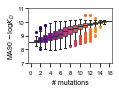

In [3]:
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1.5,1))      
sns.boxplot(x="som_mut", y="MA90_mean", data=CH65_all,palette='plasma', saturation=1,
            flierprops=flierprops, ax=ax)

plt.xlabel("# mutations",fontsize=7)
plt.ylabel("MA90 $-\log K_D$",fontsize=7,labelpad=0)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labelsize=6)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    labelsize=6,
    pad=0.5)
y_locator = FixedLocator([7,8,9,10,11])
ax.yaxis.set_major_locator(y_locator)
ax.set_yticklabels(['7','8','9','10','11'])
plt.ylim(7,11)
x_locator = FixedLocator([0,2,4,6,8,10,12,14,16])
ax.xaxis.set_major_locator(x_locator)
ax.set_xticklabels(['0','2','4','6','8','10','12','14','16'])

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = lighten_color(artist.get_facecolor(), 1.2)
    artist.set_edgecolor(col) 
    artist.set_edgecolor('black') 
    artist.set_linewidth(0.5)

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_mfc(col)
        line.set_mec(col)
        line.set_linewidth(1)
plt.savefig('20220603_CH65_MA90_box_bymut.png', transparent=True, dpi=600,bbox_inches='tight')

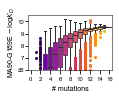

In [4]:
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1.5,1))      
sns.boxplot(x="som_mut", y="G189E_mean", data=CH65_all,palette='plasma', saturation=1,
            flierprops=flierprops, ax=ax)

plt.xlabel("# mutations",fontsize=7)
plt.ylabel("MA90-G189E $-\log K_D$",fontsize=7,labelpad=0)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labelsize=6)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    labelsize=6,
    pad=0.5)
y_locator = FixedLocator([6,7,8,9,10])
ax.yaxis.set_major_locator(y_locator)
ax.set_yticklabels(['≤6','7','8','9','10'])
plt.ylim(6,10.5)
plt.axhline(y=6,linestyle='dashed',linewidth=0.5,color='black')
x_locator = FixedLocator([0,2,4,6,8,10,12,14,16])
ax.xaxis.set_major_locator(x_locator)
ax.set_xticklabels(['0','2','4','6','8','10','12','14','16'])

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = lighten_color(artist.get_facecolor(), 1.2)
    artist.set_edgecolor(col) 
    artist.set_edgecolor('black') 
    artist.set_linewidth(0.5)

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_mfc(col)
        line.set_mec(col)
        line.set_linewidth(1)
plt.savefig('20220603_CH65_G189E_box_bymut.png', transparent=True, dpi=600,bbox_inches='tight')

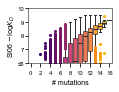

In [5]:
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1.5,1))      
sns.boxplot(x="som_mut", y="SI06_mean", data=CH65_all,palette='plasma', saturation=1,
            flierprops=flierprops, ax=ax)

plt.xlabel("# mutations",fontsize=7)
plt.ylabel("SI06 $-\log K_D$",fontsize=7,labelpad=0)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labelsize=6)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    labelsize=6,
    pad=0.5)
y_locator = FixedLocator([6,7,8,9,10])
ax.yaxis.set_major_locator(y_locator)
ax.set_yticklabels(['≤6','7','8','9','10'])
plt.ylim(6,10)
plt.axhline(y=6,linestyle='dashed',linewidth=0.5,color='black')
x_locator = FixedLocator([0,2,4,6,8,10,12,14,16])
ax.xaxis.set_major_locator(x_locator)
ax.set_xticklabels(['0','2','4','6','8','10','12','14','16'])

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = lighten_color(artist.get_facecolor(), 1.2)
    artist.set_edgecolor(col) 
    artist.set_edgecolor('black') 
    artist.set_linewidth(0.5)

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_mfc(col)
        line.set_mec(col)
        line.set_linewidth(1)
plt.savefig('20220603_CH65_SI06_box_bymut.png', transparent=True, dpi=600,bbox_inches='tight')

## Pleiotropy scatter plots

<Figure size 432x288 with 0 Axes>

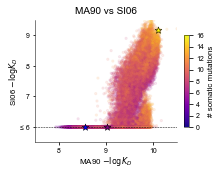

In [9]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
cmap=plt.cm.plasma
plt.clf()
# plot
x = CH65_all['MA90_mean']
y = CH65_all['SI06_mean']
plt.rcParams['grid.color'] = "white"
fig = plt.figure(figsize=(2.75,2.25))
ax = fig.add_subplot()
x_locator = FixedLocator([8,9,10])
y_locator = FixedLocator([6,7,8,9])
ax.set_xticklabels(['8','9','10'])
ax.set_yticklabels(['≤ 6','7','8','9'])
ax.xaxis.set_major_locator(x_locator)
ax.yaxis.set_major_locator(y_locator)
plt.axvline(x=6,linestyle='dashed',linewidth=0.5,color='black')
plt.axhline(y=6,linestyle='dashed',linewidth=0.5,color='black')
ax.scatter(x,y, c=CH65_all['som_mut'], cmap=cmap, s=5, alpha = 0.1, zorder=-10000)
germ=ax.scatter(germ_MA90,germ_SI06, s=50,c='blue', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=99999999)
I2=ax.scatter(I2_MA90,I2_SI06,s=50,c='purple', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
som=ax.scatter(som_MA90,som_SI06,s=50,c='yellow', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
ax.yaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.xaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.set_xlim([7.5, 10.5])
ax.set_ylim([5.5, 9.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('MA90 $-\log K_D$',fontsize=8,labelpad=1)
plt.ylabel('SI06 $-\log K_D$',fontsize=8,labelpad=0)
plt.title('MA90 vs SI06',fontsize=10)
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin = 0, vmax=16))
sm._A = []
cbar = plt.colorbar(sm,fraction=0.03, pad=0.05,orientation='vertical',aspect=20,ticks=[0,2,4,6,8,10,12,14,16])
cbar.set_label(label='# somatic mutations',size=8)
cbar.ax.tick_params(labelsize=7)
plt.savefig("20220603_CH65_MA90_SI06.png", transparent=True, dpi=600,bbox_inches='tight')

/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_9936/3014379421.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['8','9','10'])
/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_9936/3014379421.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['≤ 6','7','8','9','10'])


<Figure size 432x288 with 0 Axes>

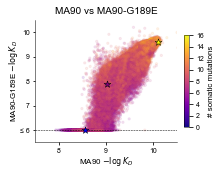

In [6]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
cmap=plt.cm.plasma
plt.clf()
# plot
x = CH65_all['MA90_mean']
y = CH65_all['G189E_mean']
plt.rcParams['grid.color'] = "white"
fig = plt.figure(figsize=(2.75,2.25))
ax = fig.add_subplot()
x_locator = FixedLocator([8,9,10])
y_locator = FixedLocator([6,7,8,9,10])
ax.set_xticklabels(['8','9','10'])
ax.set_yticklabels(['≤ 6','7','8','9','10'])
ax.xaxis.set_major_locator(x_locator)
ax.yaxis.set_major_locator(y_locator)
plt.axvline(x=6,linestyle='dashed',linewidth=0.5,color='black')
plt.axhline(y=6,linestyle='dashed',linewidth=0.5,color='black')
ax.scatter(x,y, c=CH65_all['som_mut'], cmap=cmap, s=5, alpha = 0.1, zorder=-10000)
germ=ax.scatter(germ_MA90,germ_G189E, s=50,c='blue', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=99999999)
I2=ax.scatter(I2_MA90,I2_G189E,s=50,c='purple', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
som=ax.scatter(som_MA90,som_G189E,s=50,c='yellow', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
ax.yaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.xaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.set_xlim([7.5, 10.5])
ax.set_ylim([5.5, 10.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('MA90 $-\log K_D$',fontsize=8,labelpad=1)
plt.ylabel('MA90-G189E $-\log K_D$',fontsize=8,labelpad=0)
plt.title('MA90 vs MA90-G189E',fontsize=10)
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin = 0, vmax=16))
sm._A = []
cbar = plt.colorbar(sm,fraction=0.03, pad=0.05,orientation='vertical',aspect=20,ticks=[0,2,4,6,8,10,12,14,16])
cbar.set_label(label='# somatic mutations',size=8)
cbar.ax.tick_params(labelsize=7)
plt.savefig("images/20220603_CH65_MA90_G189E.png", transparent=True, dpi=600,bbox_inches='tight')

/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_9936/3254389314.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['≤ 6','7','8','9','10'])
/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_9936/3254389314.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['≤ 6','7','8','9','10'])


<Figure size 432x288 with 0 Axes>

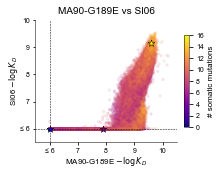

In [7]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
cmap=plt.cm.plasma
plt.clf()
# plot
x = CH65_all['G189E_mean']
y = CH65_all['SI06_mean']
plt.rcParams['grid.color'] = "white"
fig = plt.figure(figsize=(2.75,2.25))
ax = fig.add_subplot()
x_locator = FixedLocator([6,7,8,9,10])
y_locator = FixedLocator([6,7,8,9,10])
ax.set_xticklabels(['≤ 6','7','8','9','10'])
ax.set_yticklabels(['≤ 6','7','8','9','10'])
ax.xaxis.set_major_locator(x_locator)
ax.yaxis.set_major_locator(y_locator)
plt.axvline(x=6,linestyle='dashed',linewidth=0.5,color='black')
plt.axhline(y=6,linestyle='dashed',linewidth=0.5,color='black')
ax.scatter(x,y, c=CH65_all['som_mut'], cmap=cmap, s=5, alpha = 0.1, zorder=-10000)
germ=ax.scatter(germ_G189E,germ_SI06, s=50,c='blue', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=99999999)
I2=ax.scatter(I2_G189E,I2_SI06,s=50,c='purple', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
som=ax.scatter(som_G189E,som_SI06,s=50,c='yellow', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
ax.yaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.xaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.set_xlim([5.5, 10.5])
ax.set_ylim([5.5, 10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('MA90-G189E $-\log K_D$',fontsize=8,labelpad=1)
plt.ylabel('SI06 $-\log K_D$',fontsize=8,labelpad=0)
plt.title('MA90-G189E vs SI06',fontsize=10)
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin = 0, vmax=16))
sm._A = []
cbar = plt.colorbar(sm,fraction=0.03, pad=0.05,orientation='vertical',aspect=20,ticks=[0,2,4,6,8,10,12,14,16])
cbar.set_label(label='# somatic mutations',size=8)
cbar.ax.tick_params(labelsize=7)
plt.savefig("images/20220603_CH65_G189E_SI06.png", transparent=True, dpi=600,bbox_inches='tight')

/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_9936/3502865813.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['8','9','10'])
/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_9936/3502865813.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['≤ 6','7','8','9',10])
/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_9936/3502865813.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels(['≤ 6','7','8','9','10'])


65536


<Figure size 432x288 with 0 Axes>

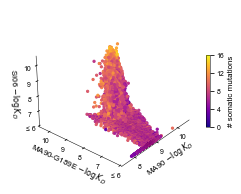

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
cmap=plt.cm.plasma
plt.clf()
# plot
x = CH65_all['MA90_mean']
y = CH65_all['G189E_mean']
z = CH65_all['SI06_mean']
plt.rcParams['grid.color'] = "white"
fig = plt.figure(figsize=(3.25,4))
ax = fig.add_subplot(111, projection='3d')
x_locator = FixedLocator([8,9,10])
ax.set_xticklabels(['8','9','10'])
y_locator = FixedLocator([6,7,8,9,10])
ax.set_yticklabels(['≤ 6','7','8','9',10])
z_locator = FixedLocator([6,7,8,9,10])
ax.set_zticklabels(['≤ 6','7','8','9','10'])
ax.xaxis.set_major_locator(x_locator)
ax.yaxis.set_major_locator(y_locator)
ax.zaxis.set_major_locator(z_locator)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.scatter(x,y,z, c=CH65_all['som_mut'], cmap=cmap, s=5, alpha = 1, zorder=-10000)
ax.view_init(30, 220)
ax.zaxis.set_tick_params(labelsize=7,pad=-3,length=2.5)
ax.yaxis.set_tick_params(labelsize=7,pad=-3,length=2.5)
ax.xaxis.set_tick_params(labelsize=7,pad=-3,length=2.5)
ax.set_xlim([7.5, 10.5])
ax.set_ylim([6, 10.5])
ax.set_zlim([6, 10.5])

plt.xlabel('MA90 $-\log K_D$',fontsize=8,labelpad=-8)
plt.ylabel('MA90-G189E $-\log K_D$',fontsize=8,labelpad=-8)
ax.set_zlabel('SI06 $-\log K_D$',fontsize=8,labelpad=-8,rotation=180)
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin = 0, vmax=16))
sm._A = []
cbar = plt.colorbar(sm,fraction=0.02, pad=0.05,orientation='vertical',aspect=20,ticks=[0,4,8,12,16])
cbar.set_label(label='# somatic mutations',size=8)
cbar.ax.tick_params(labelsize=7)
print(y.shape[0])
plt.savefig("images/20220603_MA90_G189E_SI06.png", transparent=True, dpi=600,bbox_inches='tight')

In [18]:
y.count()

64142

<Figure size 432x288 with 0 Axes>

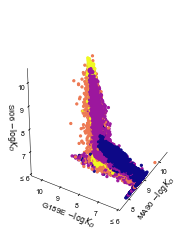

In [13]:
#color by number of I-2 mutations
CH65_all['i2mut']=CH65_all['pos7']+CH65_all['pos9']+CH65_all['pos11']

# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
cmap=plt.cm.plasma
plt.clf()
# plot
x = CH65_all['MA90_mean']
y = CH65_all['G189E_mean']
z = CH65_all['SI06_mean']
plt.rcParams['grid.color'] = "white"
fig = plt.figure(figsize=(3.25,4))
ax = fig.add_subplot(111, projection='3d')
x_locator = FixedLocator([8,9,10])
ax.set_xticklabels(['8','9','10'])
y_locator = FixedLocator([6,7,8,9,10])
ax.set_yticklabels(['≤ 6','7','8','9',10])
z_locator = FixedLocator([6,7,8,9,10])
ax.set_zticklabels(['≤ 6','7','8','9','10'])
ax.xaxis.set_major_locator(x_locator)
ax.yaxis.set_major_locator(y_locator)
ax.zaxis.set_major_locator(z_locator)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.scatter(x,y,z, c=CH65_all['i2mut'], cmap=cmap, s=5, alpha = 1, zorder=-10000)
ax.view_init(30, 210)
ax.zaxis.set_tick_params(labelsize=7,pad=-3,length=2.5)
ax.yaxis.set_tick_params(labelsize=7,pad=-3,length=2.5)
ax.xaxis.set_tick_params(labelsize=7,pad=-3,length=2.5)
ax.set_xlim([7.5, 10.5])
ax.set_ylim([6, 10.5])
ax.set_zlim([6, 10.5])

plt.xlabel('MA90 $-\log K_D$',fontsize=8,labelpad=-8)
plt.ylabel('G189E $-\log K_D$',fontsize=8,labelpad=-8)
ax.set_zlabel('SI06 $-\log K_D$',fontsize=8,labelpad=-8,rotation=180)
plt.savefig("20220603_MA90_G189E_SI06_i2mut.png", transparent=True, dpi=600,bbox_inches='tight')

## histograms

In [27]:
CH65_all.head()

,geno,repa_x,repb_x,MA90_mean,MA90_sem,repa_y,repb_y,SI06_mean,SI06_sem,repa,...,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16,som_mut
0,0000000000000000,8.612721,8.472320,8.542521,0.070200,6.0,6.0,6.0,0.0,6.0,...,0,0,0,0,0,0,0,0,0,0
1,0000000000000001,8.631980,8.516378,8.574179,0.057801,6.0,6.0,6.0,0.0,6.0,...,0,0,0,0,0,0,0,0,1,1
2,0000000000000010,8.340245,8.290790,8.315518,0.024727,6.0,6.0,6.0,0.0,6.0,...,0,0,0,0,0,0,0,1,0,1
3,0000000000000011,8.511183,8.436571,8.473877,0.037306,6.0,6.0,6.0,0.0,6.0,...,0,0,0,0,0,0,0,1,1,2
4,0000000000000100,8.552056,8.523392,8.537724,0.014332,6.0,6.0,6.0,0.0,6.0,...,0,0,0,0,0,0,1,0,0,1


65530


/Users/angelaphillips/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

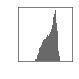

In [16]:
MA90_bind = CH65_all[CH65_all['MA90_mean']>6].copy()
print(MA90_bind['MA90_mean'].count())
MA90_bind_plot = MA90_bind[['geno','repa_x','repb_x']].copy()
MA90_bind_plot['mean'] = MA90_bind_plot.mean(axis=1)
plt.clf()
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['axes.linewidth'] = 0.5
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
x = MA90_bind_plot['mean']
fig = plt.figure(figsize=(0.97,1))
ax = fig.add_subplot()
ax.hist(-x,bins=50,color='dimgray')
ax.yaxis.set_tick_params(labelsize=7,pad=1,length=2.5,width=0)
ax.xaxis.set_tick_params(labelsize=7,pad=1,length=2.5,width=0)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.xaxis.set_major_locator(x_locator)
#ax.yaxis.set_major_formatter(formatter)
ax.set_xlim([-7, -11])
plt.xlabel('  ',fontsize=8,labelpad=1)
plt.ylabel(' ',fontsize=8,labelpad=1)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText=True)
ax.yaxis.get_offset_text().set_fontsize(7)
#plt.title('MA90',fontsize=8)
plt.savefig("images/20220614_MA90binders_hist.png", transparent=True, dpi=600,bbox_inches='tight')

27707


/Users/angelaphillips/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

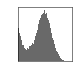

In [17]:
SI06_bind = CH65_all[CH65_all['SI06_mean']>6].copy()
print(SI06_bind['SI06_mean'].count())
SI06_bind_plot = SI06_bind[['geno','repa_y','repb_y']].copy()
SI06_bind_plot['mean'] = SI06_bind_plot.mean(axis=1)
plt.clf()
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['axes.linewidth'] = 0.5
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
x = SI06_bind_plot['mean']
fig = plt.figure(figsize=(0.97,1))
ax = fig.add_subplot()
ax.hist(-x,bins=50,color='dimgray')
ax.yaxis.set_tick_params(labelsize=7,pad=1,length=2.5,width=0)
ax.xaxis.set_tick_params(labelsize=7,pad=1,length=2.5,width=0)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.xaxis.set_major_locator(x_locator)
#ax.yaxis.set_major_formatter(formatter)
ax.set_xlim([-6, -10])
plt.xlabel('  ',fontsize=8,labelpad=1)
plt.ylabel(' ',fontsize=8,labelpad=1)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText=True)
ax.yaxis.get_offset_text().set_fontsize(7)
#plt.title('SI06',fontsize=8)
plt.savefig("images/20220614_SI06binders_hist.png", transparent=True, dpi=600,bbox_inches='tight')

56870


/Users/angelaphillips/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

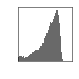

In [19]:
G189E_bind = CH65_all[CH65_all['G189E_mean']>6].copy()
print(G189E_bind['G189E_mean'].count())
G189E_bind_plot = G189E_bind[['geno','repa','repb']].copy()
G189E_bind_plot['mean'] = G189E_bind_plot.mean(axis=1)
plt.clf()
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['axes.linewidth'] = 0.5
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
x = G189E_bind_plot['mean']
fig = plt.figure(figsize=(0.97,1))
ax = fig.add_subplot()
ax.hist(-x,bins=50,color='dimgray')
ax.yaxis.set_tick_params(labelsize=7,pad=1,length=2.5,width=0)
ax.xaxis.set_tick_params(labelsize=7,pad=1,length=2.5,width=0)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.xaxis.set_major_locator(x_locator)
#ax.yaxis.set_major_formatter(formatter)
ax.set_xlim([-6, -10.5])
plt.xlabel('  ',fontsize=8,labelpad=1)
plt.ylabel(' ',fontsize=8,labelpad=1)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText=True)
ax.yaxis.get_offset_text().set_fontsize(7)
#plt.title('G189E',fontsize=8)
plt.savefig("images/20220614_G189Ebinders_hist.png", transparent=True, dpi=600,bbox_inches='tight')

## mutation frequency amongst binders

In [4]:
#calculate mean frequency amongst binders for each antigen
toplot = CH65_all[CH65_all['SI06_mean']>=9].copy()
print(toplot.shape[0])
SI06 = []
posi = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
for pos in range(1,17):
    mean = toplot['pos%s'% pos].mean()*100
    SI06.append(mean)
toplot = CH65_all[CH65_all['MA90_mean']>=9].copy()
print(toplot.shape[0])
MA90 = []
for pos in range(1,17):
    mean = toplot['pos%s'% pos].mean()*100
    MA90.append(mean)
toplot = CH65_all[CH65_all['G189E_mean']>=9].copy()
print(toplot.shape[0])
G189E = []
for pos in range(1,17):
    mean = toplot['pos%s'% pos].mean()*100
    G189E.append(mean)
print(MA90, SI06, G189E)

434
51500
21406
[49.883495145631066, 51.20970873786408, 62.32621359223302, 49.71456310679612, 55.72038834951456, 50.39611650485437, 52.09320388349514, 55.38252427184466, 50.1883495145631, 53.14174757281553, 58.39417475728156, 50.11650485436894, 50.55533980582524, 50.10485436893204, 49.077669902912625, 51.49902912621359] [78.80184331797236, 81.10599078341014, 18.433179723502306, 78.3410138248848, 93.77880184331798, 56.22119815668203, 82.25806451612904, 73.27188940092167, 79.49308755760369, 95.16129032258065, 100.0, 53.686635944700456, 47.235023041474655, 49.30875576036866, 81.5668202764977, 96.31336405529954] [49.25254601513595, 56.25058394842567, 65.97682892646921, 52.93375689059142, 64.3978323834439, 49.425394749135755, 64.94440810987574, 63.963374754741665, 54.03625151826591, 59.84303466317855, 87.16247780995982, 53.200037372699235, 49.663645706811174, 50.86891525740447, 50.728767635242455, 59.89909371204335]


In [7]:
#bootstrap to get error
Nbootstrap = 10
#MA90
bs_df = pd.DataFrame()
for bootstrap in range(Nbootstrap):
    means = []
    CH65_all['MA90_mean_%s' % bootstrap]= np.random.normal(
                        (CH65_all["MA90_mean"]).values.astype('float32'),
                        (CH65_all["MA90_sem"]).values.astype('float32'))
    binders = CH65_all[CH65_all['MA90_mean_%s' % bootstrap]>=9].copy()
    for pos in range(1,17):
        mean = binders['pos%s'% pos].mean()*100
        means.append(mean)
    bs_df['bs_%s' % bootstrap] = means
MA90err = list(bs_df.std(axis=1))
print(MA90err)

#G189E
bs_df = pd.DataFrame()
for bootstrap in range(Nbootstrap):
    means = []
    CH65_all['G189E_mean_%s' % bootstrap]= np.random.normal(
                        (CH65_all["G189E_mean"]).values.astype('float32'),
                        (CH65_all["G189E_sem"]).values.astype('float32'))
    binders = CH65_all[CH65_all['G189E_mean_%s' % bootstrap]>=9].copy()
    for pos in range(1,17):
        mean = binders['pos%s'% pos].mean()*100
        means.append(mean)
    bs_df['bs_%s' % bootstrap] = means
G189Eerr = list(bs_df.std(axis=1))
print(G189Eerr)

#SI06
bs_df = pd.DataFrame()
for bootstrap in range(Nbootstrap):
    means = []
    CH65_all['SI06_mean_%s' % bootstrap]= np.random.normal(
                        (CH65_all["SI06_mean"]).values.astype('float32'),
                        (CH65_all["SI06_sem"]).values.astype('float32'))
    binders = CH65_all[CH65_all['SI06_mean_%s' % bootstrap]>=9].copy()
    for pos in range(1,17):
        mean = binders['pos%s'% pos].mean()*100
        means.append(mean)
    bs_df['bs_%s' % bootstrap] = means
SI06err = list(bs_df.std(axis=1))
print(SI06err)
CH65=pd.DataFrame(list(zip(posi, MA90, MA90err, SI06, SI06err, G189E, G189Eerr)),
              columns=['position','MA90', 'MA90err', 'SI06', 'SI06err','G189E', 'G189Eerr'])
CH65

[0.020809660406443, 0.03184098331654356, 0.02360134341800741, 0.01956028317911346, 0.020765863290542984, 0.026569144763479807, 0.033582877343336176, 0.016708909910351944, 0.026566143703474744, 0.020924818670575572, 0.026874210607261827, 0.015633560271976963, 0.027554053491450403, 0.0290778900073753, 0.016220468864249715, 0.026068517224079036]
[0.09514059444425474, 0.04875920453894139, 0.05101068725382449, 0.06046916206663968, 0.07632152128382828, 0.05298927770038242, 0.03936727489412798, 0.07912170448365549, 0.09367689500048984, 0.053428818168344425, 0.05679289443202525, 0.048969658983960815, 0.06883473635763439, 0.0893854012045814, 0.08694467170852249, 0.06341411913458193]
[0.7980103639156496, 0.7846942988757303, 0.5413829574222021, 0.9865263386990741, 0.5603174854429117, 0.9333887163020814, 0.8610966595189818, 0.8216500007594683, 0.6315633900390835, 0.24313617642763347, 0.0, 0.8867235983086875, 0.299403433503886, 1.0278267109578898, 1.0684005850594651, 0.5008653253469283]


,position,MA90,MA90err,SI06,SI06err,G189E,G189Eerr
0,N26D,49.883495,0.020810,78.801843,0.798010,49.252546,0.095141
1,S29R,51.209709,0.031841,81.105991,0.784694,56.250584,0.048759
2,Y35N,62.326214,0.023601,18.433180,0.541383,65.976829,0.051011
3,Y48C,49.714563,0.019560,78.341014,0.986526,52.933757,0.060469
4,D49Y,55.720388,0.020766,93.778802,0.560317,64.397832,0.076322
5,V98I,50.396117,0.026569,56.221198,0.933389,49.425395,0.052989
6,G31D,52.093204,0.033583,82.258065,0.861097,64.944408,0.039367
7,Y33H,55.382524,0.016709,73.271889,0.821650,63.963375,0.079122
8,M34I,50.188350,0.026566,79.493088,0.631563,54.036252,0.093677
9,H35N,53.141748,0.020925,95.161290,0.243136,59.843035,0.053429


In [10]:
#do a two-sided t-test to see if mean of bs data is different from 50%
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
from scipy.stats import ttest_ind_from_stats
for mutation in mutation_names:
    result = ttest_ind_from_stats(mean1=CH65.loc[CH65['position']==mutation, 'MA90'].iloc[0], std1=CH65.loc[CH65['position']==mutation, 'MA90err'].iloc[0], nobs1=10,
                     mean2=50, std2=0, nobs2=10, equal_var=False)
    print(mutation,result)

N26D Ttest_indResult(statistic=-17.704310934261127, pvalue=2.653715387002744e-08)
S29R Ttest_indResult(statistic=120.14185865517796, pvalue=9.738997685501586e-16)
Y35N Ttest_indResult(statistic=1651.554709696825, pvalue=5.56965489071927e-26)
Y48C Ttest_indResult(statistic=-46.1460962758621, pvalue=5.274275561523651e-12)
D49Y Ttest_indResult(statistic=871.1150618715428, pvalue=1.7626661067685526e-23)
V98I Ttest_indResult(statistic=47.14605551951126, pvalue=4.351942251014833e-12)
G31D Ttest_indResult(statistic=197.10317883967278, pvalue=1.1329653726193554e-17)
Y33H Ttest_indResult(statistic=1018.6802341679463, pvalue=4.3103695628392785e-24)
M34I Ttest_indResult(statistic=22.420019587884212, pvalue=3.3083667223912932e-09)
H35N Ttest_indResult(statistic=474.79876981555253, pvalue=4.1515821662469916e-21)
N52H Ttest_indResult(statistic=987.7392009173292, pvalue=5.689496444927591e-24)
G57D Ttest_indResult(statistic=23.566013874169364, pvalue=2.1268217487241587e-09)
L83V Ttest_indResult(statis

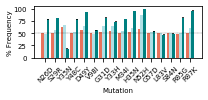

In [11]:
#plot
# create plot
n_groups = 16
#fig, ax = plt.subplots()
plt.figure(figsize=(3,1.5)) 
index = np.arange(n_groups)
bar_width = 0.28
x_axis = np.arange(len(posi))
rects1 = plt.bar(x_axis + bar_width, MA90, bar_width,
yerr = CH65['MA90err'],
color="#E8735C",
label='MA90')

rects2 = plt.bar(x_axis + 2*bar_width, G189E, bar_width,
yerr = CH65['G189Eerr'],
color="powderblue", label='G189E')

rects3 = plt.bar(x_axis + 3*bar_width, SI06, bar_width,
yerr = CH65['SI06err'],
color="teal",
label='SI06')

plt.xlabel('Mutation',fontsize=7)
plt.ylabel('% Frequency',fontsize=7,labelpad=0)
plt.title('',fontsize=8)
plt.xticks(x_axis + 2*bar_width, posi,fontsize=7,rotation=45)
plt.yticks([0,25,50,75,100],fontsize=7)
plt.axhline(y=50,linestyle='dashed',c='black',linewidth=0.25)
#plt.legend(loc='best',fontsize=5)
plt.tight_layout()
plt.savefig('images/ch65binders_mutfreq_1nM.png',dpi=1200,transparent=True)

## change in Kd by mutation position

In [3]:
import matplotlib
import matplotlib.colors as mcolors
plt.rcParams.update({'font.size': 7})
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams["xtick.major.size"] = 2
plt.rcParams["ytick.major.size"] = 2
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["ytick.major.width"] = 0.5

dMA90 = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/20220603_CH65_dKd_MA90.csv',dtype={'source':'str', 'target':'str'}))
dSI06 = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/20220603_CH65_dKd_SI06.csv',dtype={'source':'str', 'target':'str'}))
dG189E = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/20220603_CH65_dKd_G189E.csv',dtype={'source':'str', 'target':'str'}))
dMA90

,Mutation,deltaKd,Number of mutations,deltaKd_err,source,target,pos1,pos2,pos3,pos4,...,pos7,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16
0,N26D,-0.041183,0,0.081164,0000000000000000,1000000000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,N26D,-0.013948,1,0.059195,0000000000000001,1000000000000001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,N26D,-0.072410,1,0.076007,0000000000000010,1000000000000010,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,N26D,-0.046751,2,0.047428,0000000000000011,1000000000000011,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,N26D,-0.005799,1,0.098690,0000000000000100,1000000000000100,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524283,R87K,0.111434,14,0.046515,1111111111110110,1111111111110111,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0
524284,R87K,0.060908,13,0.029033,1111111111111000,1111111111111001,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
524285,R87K,0.130063,14,0.029788,1111111111111010,1111111111111011,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
524286,R87K,0.067831,14,0.032786,1111111111111100,1111111111111101,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


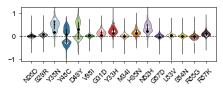

In [20]:
##MA90
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
colors = ['#121212','#808080','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','gold','#b15928','#4f1530']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Mutation", y="deltaKd", data=dMA90,scale='count',linewidth=0.25,palette=colors)
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
sns.scatterplot(x="Mutation", y="deltaKd", data=dMA90[(dMA90['source']=='0000000000000000')],color='white',s=10)
sns.scatterplot(x="Mutation", y="deltaKd", data=dMA90[(dMA90['source']=='0000001010100000')],color='gray',s=10)
sns.scatterplot(x="Mutation", y="deltaKd", data=dMA90[(dMA90['target']=='1111111111111111')],color='black',s=10)
ax.set_xticklabels(['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K'],rotation=45)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='y',
    pad=0,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_MA90_dKd.png',transparent=True, dpi=600,bbox_inches='tight')


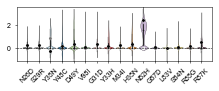

In [21]:
##SI06
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Mutation", y="deltaKd", data=dSI06,scale='count',linewidth=0.25,palette=colors)
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
sns.scatterplot(x="Mutation", y="deltaKd", data=dSI06[(dSI06['source']=='0000000000000000')],color='white',s=10)
sns.scatterplot(x="Mutation", y="deltaKd", data=dSI06[(dSI06['source']=='0000001010100000')],color='gray',s=10)
sns.scatterplot(x="Mutation", y="deltaKd", data=dSI06[(dSI06['target']=='1111111111111111')],color='black',s=10)
ax.set_xticklabels(['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K'],rotation=45)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='y',
    pad=0,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_SI06_dKd.png',transparent=True, dpi=600,bbox_inches='tight')


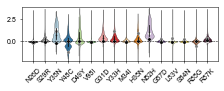

In [22]:
##G189E
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Mutation", y="deltaKd", data=dG189E,scale='count',linewidth=0.25,palette=colors)
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
sns.scatterplot(x="Mutation", y="deltaKd", data=dG189E[(dG189E['source']=='0000000000000000')],color='white',s=10)
sns.scatterplot(x="Mutation", y="deltaKd", data=dG189E[(dG189E['source']=='0000001010100000')],color='gray',s=10)
sns.scatterplot(x="Mutation", y="deltaKd", data=dG189E[(dG189E['target']=='1111111111111111')],color='black',s=10)
ax.set_xticklabels(['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K'],rotation=45)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='y',
    pad=0,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_G189E_dKd.png',transparent=True, dpi=600,bbox_inches='tight')


## change in Kd by number of other mutations present

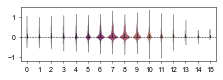

In [14]:
##MA90
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Number of mutations", y="deltaKd", data=dMA90,scale='count',linewidth=0.25,palette='plasma')
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='y',
    pad=0,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_MA90_dKd_num.png',transparent=True, dpi=600,bbox_inches='tight')


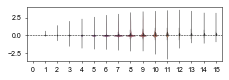

In [15]:
##SI06
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Number of mutations", y="deltaKd", data=dSI06,scale='count',linewidth=0.25,palette='plasma')
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='y',
    pad=0,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_SI06_dKd_num.png',transparent=True, dpi=600,bbox_inches='tight')


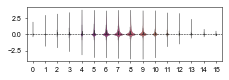

In [3]:
##G189E
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Number of mutations", y="deltaKd", data=dG189E,scale='count',linewidth=0.25,palette='plasma')
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='y',
    pad=0,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_G189E_dKd_num.png',transparent=True, dpi=600,bbox_inches='tight')


## do some statistics

In [29]:
#do a two-sided t-test to see if mean is different from zero
MA90_dKd_mean = []
MA90_dKd_sem = []
#MA90
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
for mutation_name in mutation_names:
    vals_1 = np.array(dMA90['deltaKd'][dMA90['Mutation']==mutation_name])
    mean = np.nanmean(vals_1)
    sem = st.sem(vals_1, nan_policy='omit')
    MA90_dKd_mean.append(mean)
    MA90_dKd_sem.append(sem)
    vals_2 = 0
    n1 = len(np.where(~np.isnan(vals_1))[0])
    n2 = len(np.where(~np.isnan(vals_2))[0])
    tstat,pval = st.ttest_1samp(vals_1,vals_2,nan_policy='omit')
    if pval < 0.0001/16:
        lab = '***'
    elif pval < 0.001/16:
        lab = '**'
    elif pval < 0.01/16:
        lab = '*'
    else:
        lab = 'ns'
    print(mutation_name,tstat,pval,n1,n2,lab)
print(MA90_dKd_mean)
print(MA90_dKd_sem)

N26D -17.49622033678028 3.1305680275352215e-68 32762 1 ***
S29R 135.57915528619583 0.0 32762 1 ***
Y35N 402.71970913763585 0.0 32762 1 ***
Y48C -4.774256960671532 1.8115012791866342e-06 32762 1 ***
D49Y 126.46605342610846 0.0 32762 1 ***
V98I 41.61793338439802 0.0 32762 1 ***
G31D 224.4440102775109 0.0 32762 1 ***
Y33H 291.4200116081569 0.0 32762 1 ***
M34I 35.75365351693004 1.1242564308649825e-274 32762 1 ***
H35N 214.33790334283472 0.0 32762 1 ***
N52H 351.5438567647479 0.0 32762 1 ***
G57D 26.143402736984346 3.98225094691312e-149 32762 1 ***
L83V 77.35682537046235 0.0 32762 1 ***
S84N 19.302265837582457 1.4792578241171503e-82 32762 1 ***
R85G -72.4337704966313 0.0 32762 1 ***
R87K 189.06225484977338 0.0 32762 1 ***
[-0.005893977961114668, 0.051352658490595164, 0.4759222379250787, -0.009082120467981241, 0.24535351194887825, 0.013609464374481413, 0.1505761007654954, 0.2453171582580942, 0.01619500506607654, 0.16414892017899635, 0.3578815730893253, 0.011359265035294256, 0.02772438193912

In [30]:
#do a two-sided t-test to see if mean is different from zero
SI06_dKd_mean = []
SI06_dKd_sem = []
#SI06
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
for mutation_name in mutation_names:
    vals_1 = np.array(dSI06['deltaKd'][dSI06['Mutation']==mutation_name])
    mean = np.nanmean(vals_1)
    sem = st.sem(vals_1, nan_policy='omit')
    SI06_dKd_mean.append(mean)
    SI06_dKd_sem.append(sem)
    vals_2 = 0
    n1 = len(np.where(~np.isnan(vals_1))[0])
    n2 = len(np.where(~np.isnan(vals_2))[0])
    tstat,pval = st.ttest_1samp(vals_1,vals_2,nan_policy='omit')
    if pval < 0.0001/16:
        lab = '***'
    elif pval < 0.001/16:
        lab = '**'
    elif pval < 0.01/16:
        lab = '*'
    else:
        lab = 'ns'
    print(mutation_name,tstat,pval,n1,n2,lab)
print(SI06_dKd_mean)
print(SI06_dKd_sem)

N26D 96.37375956234308 0.0 32624 1 ***
S29R 95.47460284969269 0.0 32627 1 ***
Y35N 100.4080887712144 0.0 32621 1 ***
Y48C 13.212087213357252 9.455229764788375e-40 32621 1 ***
D49Y 98.30082443660689 0.0 32621 1 ***
V98I 55.764431504110995 0.0 32626 1 ***
G31D 106.64712379502492 0.0 32621 1 ***
Y33H 104.16222446019515 0.0 32622 1 ***
M34I 82.6387962854266 0.0 32623 1 ***
H35N 107.86170477709537 0.0 32624 1 ***
N52H 262.3568647373215 0.0 32621 1 ***
G57D 49.475153670323316 0.0 32623 1 ***
L83V 11.346452613364486 8.783485053661962e-30 32627 1 ***
S84N 24.75026004082832 5.320450707725816e-134 32628 1 ***
R85G 40.73491293256815 0.0 32623 1 ***
R87K 113.90481756584798 0.0 32626 1 ***
[0.12520594628671955, 0.142750908108728, 0.35073012941518245, 0.045926824044879425, 0.4239514906285762, 0.04125365710644581, 0.16014556378149758, 0.262465434236992, 0.11412351961934822, 0.32814613813829496, 1.3519330073837346, 0.045892466855481956, 0.008644957932799765, 0.017232374872912633, 0.05197350273803228, 

In [31]:
#do a two-sided t-test to see if mean is different from zero
G189E_dKd_mean = []
G189E_dKd_sem = []
#G189E
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
for mutation_name in mutation_names:
    vals_1 = np.array(dG189E['deltaKd'][dG189E['Mutation']==mutation_name])
    mean = np.nanmean(vals_1)
    sem = st.sem(vals_1, nan_policy='omit')
    G189E_dKd_mean.append(mean)
    G189E_dKd_sem.append(sem)
    vals_2 = 0
    n1 = len(np.where(~np.isnan(vals_1))[0])
    n2 = len(np.where(~np.isnan(vals_2))[0])
    tstat,pval = st.ttest_1samp(vals_1,vals_2,nan_policy='omit')
    if pval < 0.0001/16:
        lab = '***'
    elif pval < 0.001/16:
        lab = '**'
    elif pval < 0.01/16:
        lab = '*'
    else:
        lab = 'ns'
    print(mutation_name,tstat,pval,n1,n2,lab)
print(G189E_dKd_mean)
print(G189E_dKd_sem)

N26D -17.01636327613364 1.2084864991259666e-64 31516 1 ***
S29R 140.45421244698696 0.0 31438 1 ***
Y35N 208.03593563870447 0.0 31375 1 ***
Y48C -4.678298630159148 2.9046981345444966e-06 31389 1 ***
D49Y 127.98670255855788 0.0 31414 1 ***
V98I -12.708873942507783 6.5059588536750305e-37 31484 1 ***
G31D 201.75928034066973 0.0 31393 1 ***
Y33H 150.62389035733656 0.0 31449 1 ***
M34I 67.64775642046105 0.0 31486 1 ***
H35N 111.8922289257432 0.0 31406 1 ***
N52H 276.96753977114196 0.0 31374 1 ***
G57D 52.53145016583634 0.0 31486 1 ***
L83V -0.7757582712033679 0.43789755204884395 31494 1 ns
S84N 12.618481432591402 2.0461217532659542e-36 31500 1 ***
R85G 7.494737381654909 6.817497161816718e-14 31483 1 ***
R87K 143.54791824079933 0.0 31465 1 ***
[-0.02378831380815367, 0.28286350757334827, 0.9484712899428741, -0.019971257117469006, 0.6085149275034276, -0.017200922458633233, 0.5561756047117783, 0.381848708072984, 0.10956410034490038, 0.34758419252535483, 1.2587208087069597, 0.08102825470468118, -

## make an output file to plot with expression data elsewhere

In [7]:
array = zip(mutation_names,MA90_dKd_mean,MA90_dKd_sem,SI06_dKd_mean,SI06_dKd_sem,G189E_dKd_mean,G189E_dKd_sem)
summary = pd.DataFrame(data = array, columns = ['mutation_names','MA90_dKd_mean','MA90_dKd_sem','SI06_dKd_mean','SI06_dKd_sem','G189E_dKd_mean','G189E_dKd_sem'])
summary.to_csv('../../Kd_Inference/results_CH65/Kd_processed/dKd_summary.csv')
summary

NameError: name 'mutation_names' is not defined

## plot correlations in dKd between antigens

In [8]:
toplot = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/dKd_summary.csv'))
toplot

,Unnamed: 0,mutation_names,MA90_dKd_mean,MA90_dKd_sem,SI06_dKd_mean,SI06_dKd_sem,G189E_dKd_mean,G189E_dKd_sem
0,0,N26D,-0.005894,0.000337,0.125206,0.001299,-0.023788,0.001398
1,1,S29R,0.051353,0.000379,0.142751,0.001495,0.282864,0.002014
2,2,Y35N,0.475922,0.001182,0.350730,0.003493,0.948471,0.004559
3,3,Y48C,-0.009082,0.001902,0.045927,0.003476,-0.019971,0.004269
4,4,D49Y,0.245354,0.001940,0.423951,0.004313,0.608515,0.004755
5,5,V98I,0.013609,0.000327,0.041254,0.000740,-0.017201,0.001353
6,6,G31D,0.150576,0.000671,0.160146,0.001502,0.556176,0.002757
7,7,Y33H,0.245317,0.000842,0.262465,0.002520,0.381849,0.002535
8,8,M34I,0.016195,0.000453,0.114124,0.001381,0.109564,0.001620
9,9,H35N,0.164149,0.000766,0.328146,0.003042,0.347584,0.003106


0.6975240018734943


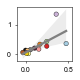

In [16]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
colors = ['#121212','#808080','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','gold','#b15928','#4f1530']

corr, _ = pearsonr(toplot['MA90_dKd_mean'], toplot['SI06_dKd_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['MA90_dKd_mean'], toplot['SI06_dKd_mean'])
plt.figure(figsize=(1,1))
ax = sns.scatterplot(x='MA90_dKd_mean', y='SI06_dKd_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['MA90_dKd_sem'],xerr=toplot['SI06_dKd_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='MA90_dKd_mean', y='SI06_dKd_mean',data=toplot, scatter=False, ax=ax,color='gray')
# plt.xlim(-0.1,1.5)
# plt.ylim(-0.1,1.5)
# plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
plt.xlabel('',fontsize=7,labelpad=0.5)
plt.ylabel('',fontsize=7,labelpad=0.5)
# plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
# plt.yticks(ticks=[0,1,2,3],labels=['0','1','2','3'],fontsize=7)
plt.savefig('images/CH65_MA90_SI06.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

0.9230932530571543


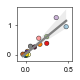

In [17]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
colors = ['#121212','#808080','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','gold','#b15928','#4f1530']

corr, _ = pearsonr(toplot['MA90_dKd_mean'], toplot['G189E_dKd_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['MA90_dKd_mean'], toplot['G189E_dKd_mean'])
plt.figure(figsize=(1,1))
ax = sns.scatterplot(x='MA90_dKd_mean', y='G189E_dKd_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['MA90_dKd_sem'],xerr=toplot['G189E_dKd_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='MA90_dKd_mean', y='G189E_dKd_mean',data=toplot, scatter=False, ax=ax,color='gray')
# plt.xlim(-0.1,1.5)
# plt.ylim(-0.1,1.5)
# plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
plt.xlabel('',fontsize=7,labelpad=0.5)
plt.ylabel('',fontsize=7,labelpad=0.5)
# plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
# plt.yticks(ticks=[0,1,2,3],labels=['0','1','2','3'],fontsize=7)
plt.savefig('images/CH65_MA90_G189E.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

0.8638280339289898


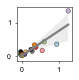

In [19]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
colors = ['#121212','#808080','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','gold','#b15928','#4f1530']

corr, _ = pearsonr(toplot['G189E_dKd_mean'], toplot['SI06_dKd_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['G189E_dKd_mean'], toplot['SI06_dKd_mean'])
plt.figure(figsize=(1,1))
ax = sns.scatterplot(x='G189E_dKd_mean', y='SI06_dKd_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['G189E_dKd_sem'],xerr=toplot['SI06_dKd_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='G189E_dKd_mean', y='SI06_dKd_mean',data=toplot, scatter=False, ax=ax,color='gray')
# plt.xlim(-0.1,1.5)
# plt.ylim(-0.1,1.5)
# plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
plt.xlabel('',fontsize=7,labelpad=0.5)
plt.ylabel('',fontsize=7,labelpad=0.5)
# plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
# plt.yticks(ticks=[0,1,2,3],labels=['0','1','2','3'],fontsize=7)
plt.savefig('images/CH65_G189E_SI06.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)